<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_cluster_data_add_delta_(_2)_n120_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition/addition_delta_-2'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-2_n120.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.155982,27.927383,37.249499,0.002376,114.335241,114.330253,0.004988
1,0.0,1.0,97.465085,91.006693,20.248044,0.011592,218.731414,218.712819,0.018595
2,0.0,2.0,23.246462,71.946323,25.338045,-0.020551,130.510279,130.525097,-0.014817
3,0.0,3.0,26.233796,87.397591,63.894934,-0.006641,187.519681,187.526068,-0.006387
4,0.0,4.0,24.321436,58.898429,63.778162,-0.021341,156.976686,156.998581,-0.021895
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,48.503006,40.684454,68.149739,0.012793,167.349992,167.337332,0.012660
119996,999.0,116.0,20.290452,67.779585,89.206815,-0.001834,187.275019,187.282525,-0.007506
119997,999.0,117.0,60.856062,76.014766,37.611869,-0.005363,184.477334,184.477469,-0.000135
119998,999.0,118.0,63.106186,51.799209,24.395328,-0.016660,149.284063,149.294052,-0.009989


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    39.155982  27.927383  37.249499  0.002376  114.335241   
      1.0    97.465085  91.006693  20.248044  0.011592  218.731414   
      2.0    23.246462  71.946323  25.338045 -0.020551  130.510279   
      3.0    26.233796  87.397591  63.894934 -0.006641  187.519681   
      4.0    24.321436  58.898429  63.778162 -0.021341  156.976686   
...                ...        ...        ...       ...         ...   
999.0 115.0  48.503006  40.684454  68.149739  0.012793  167.349992   
      116.0  20.290452  67.779585  89.206815 -0.001834  187.275019   
      117.0  60.856062  76.014766  37.611869 -0.005363  184.477334   
      118.0  63.106186  51.799209  24.395328 -0.016660  149.284063   
      119.0  54.182099  44.177582  66.737739  0.008684  175.106106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    114.330253  0.004988  
      1.0    218.712819  0.018595  
      2.0    130.525097 -0.014817  
      3.0    187.526068 -0.006387  
      4.0    156.998581 -0.021895  
...                 ...       ...  
999.0 115.0  167.337332  0.012660  
      116.0  187.282525 -0.007506  
      117.0  184.477469 -0.000135  
      118.0  149.294052 -0.009989  
      119.0  175.096640  0.009466  

[120000 rows x 7 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    39.155982  27.927383  37.249499  0.002376  114.335241   
      1.0    97.465085  91.006693  20.248044  0.011592  218.731414   
      2.0    23.246462  71.946323  25.338045 -0.020551  130.510279   
      3.0    26.233796  87.397591  63.894934 -0.006641  187.519681   
      4.0    24.321436  58.898429  63.778162 -0.021341  156.976686   
...                ...        ...        ...       ...         ...   
999.0 115.0  48.503006  40.684454  68.149739  0.012793  167.349992   
      116.0  20.290452  67.779585  89.206815 -0.001834  187.275019   
      117.0  60.856062  76.014766  37.611869 -0.005363  184.477334   
      118.0  63.106186  51.799209  24.395328 -0.016660  149.284063   
      119.0  54.182099  44.177582  66.737739  0.008684  175.106106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    114.330253  0.004988  
      1.0    218.712819  0.018595  
      2.0    130.525097 -0.014817  
      3.0    187.526068 -0.006387  
      4.0    156.998581 -0.021895  
...                 ...       ...  
999.0 115.0  167.337332  0.012660  
      116.0  187.282525 -0.007506  
      117.0  184.477469 -0.000135  
      118.0  149.294052 -0.009989  
      119.0  175.096640  0.009466  

[120000 rows x 7 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,39.155982,27.927383,37.249499,0.002376,114.335241,114.330253,0.004988
1,0.0,1.0,97.465085,91.006693,20.248044,0.011592,218.731414,218.712819,0.018595
2,0.0,2.0,23.246462,71.946323,25.338045,-0.020551,130.510279,130.525097,-0.014817
3,0.0,3.0,26.233796,87.397591,63.894934,-0.006641,187.519681,187.526068,-0.006387
4,0.0,4.0,24.321436,58.898429,63.778162,-0.021341,156.976686,156.998581,-0.021895
...,...,...,...,...,...,...,...,...,...
119995,999.0,115.0,48.503006,40.684454,68.149739,0.012793,167.349992,167.337332,0.012660
119996,999.0,116.0,20.290452,67.779585,89.206815,-0.001834,187.275019,187.282525,-0.007506
119997,999.0,117.0,60.856062,76.014766,37.611869,-0.005363,184.477334,184.477469,-0.000135
119998,999.0,118.0,63.106186,51.799209,24.395328,-0.016660,149.284063,149.294052,-0.009989


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         x3         e           Y  \
rep   index                                                          
0.0   0.0    39.155982  27.927383  37.249499  0.002376  114.335241   
      1.0    97.465085  91.006693  20.248044  0.011592  218.731414   
      2.0    23.246462  71.946323  25.338045 -0.020551  130.510279   
      3.0    26.233796  87.397591  63.894934 -0.006641  187.519681   
      4.0    24.321436  58.898429  63.778162 -0.021341  156.976686   
...                ...        ...        ...       ...         ...   
999.0 115.0  48.503006  40.684454  68.149739  0.012793  167.349992   
      116.0  20.290452  67.779585  89.206815 -0.001834  187.275019   
      117.0  60.856062  76.014766  37.611869 -0.005363  184.477334   
      118.0  63.106186  51.799209  24.395328 -0.016660  149.284063   
      119.0  54.182099  44.177582  66.737739  0.008684  175.106106   

                  y_hat     e_hat  
rep   index                        
0.0   0.0    114.330253  0.004988  
      1.0    218.712819  0.018595  
      2.0    130.525097 -0.014817  
      3.0    187.526068 -0.006387  
      4.0    156.998581 -0.021895  
...                 ...       ...  
999.0 115.0  167.337332  0.012660  
      116.0  187.282525 -0.007506  
      117.0  184.477469 -0.000135  
      118.0  149.294052 -0.009989  
      119.0  175.096640  0.009466  

[120000 rows x 7 columns]

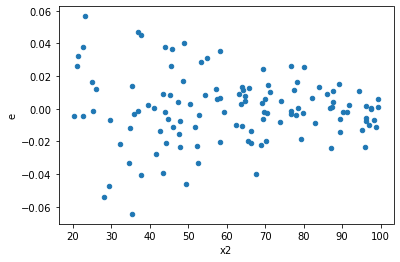

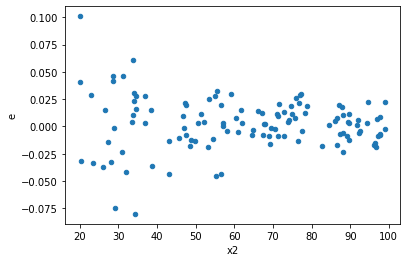

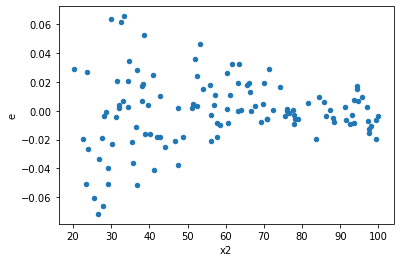

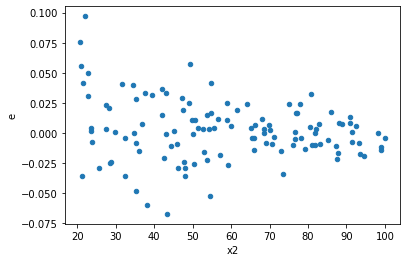

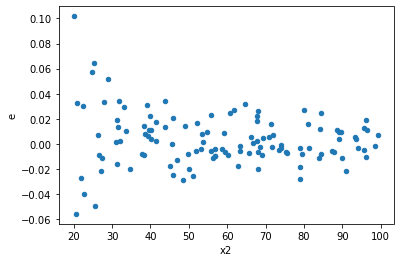

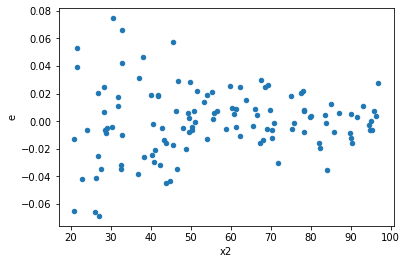

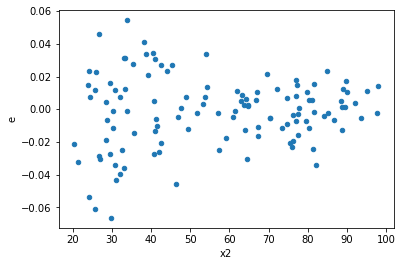

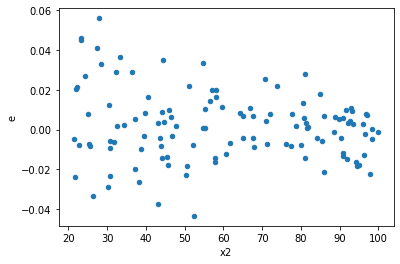

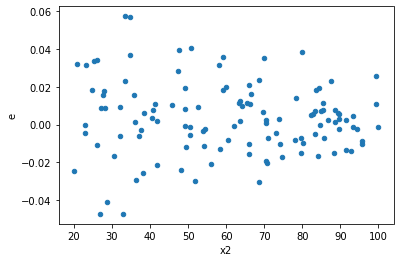

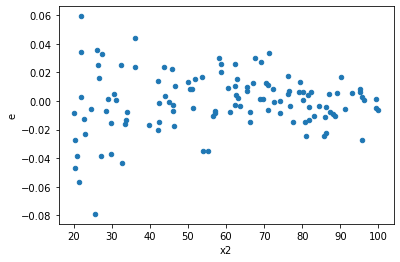

In [11]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["x1", "x2", "x3"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
1.0,60.0,54.0,0.017999272697791138,0.027418354454509672,0.00029998787829651894,0.0005077473047131421,1.692559404721234,0.05112838600563263,0.9744358069971837,0.025564193002816316,Reject005=1 : Homoscedasticity
2.0,53.0,61.0,0.021785212168541002,0.03750645324836416,0.0004110417390290755,0.0006148598893174452,1.4958575515221642,0.12900899307063152,0.9354955034646842,0.06450449653531576,Reject005=1 : Homoscedasticity
3.0,51.0,63.0,0.0065545781257122905,0.0393826810627703,0.00012852113971984882,0.0006251219216312746,4.863961858678808,6.8344709891476896e-09,0.9999999965827645,3.4172354945738448e-09,Reject005=0 : Heteroscedasticity
9.0,57.0,57.0,0.018790780424449722,0.01920094103890467,0.0003296628144640302,0.0003368586147176258,1.0218277583575648,0.9353194144466057,0.5323402927766971,0.46765970722330286,Reject005=1 : Homoscedasticity
10.0,64.0,50.0,0.022368687717790343,0.02821535329395159,0.0003495107455904741,0.0005643070658790318,1.6145628510667798,0.08001719585720202,0.959991402071399,0.04000859792860101,Reject005=1 : Homoscedasticity
12.0,59.0,55.0,0.028611538139636714,0.03513612587560333,0.00048494132440062227,0.0006388386522836969,1.3173524716073406,0.3035357261961229,0.8482321369019385,0.15176786309806145,Reject005=1 : Homoscedasticity
14.0,65.0,49.0,0.015347580812360612,0.034873476449679,0.00023611662788247095,0.0007117036010138572,3.014203647564007,9.495115680491217e-05,0.9999525244215975,4.747557840245609e-05,Reject005=0 : Heteroscedasticity
15.0,54.0,60.0,0.03294615645546847,0.037492716385191034,0.0006101140084346014,0.0006248786064198506,1.024199736083968,0.9247693440875571,0.5376153279562215,0.46238467204377853,Reject005=1 : Homoscedasticity
17.0,61.0,53.0,0.014966753947629207,0.01718086943381608,0.0002453566220922821,0.0003241673478078506,1.3212088797258004,0.301584040443605,0.8492079797781975,0.1507920202218025,Reject005=1 : Homoscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,54.0,60.0,0.02425247914351689,0.024763313831609027,0.00044911998413920166,0.0004127218971934838,0.918956875153352,0.7548460641880135,Reject005=1 : Homoscedasticity
1.0,60.0,54.0,0.017999272697791138,0.027418354454509672,0.00029998787829651894,0.0005077473047131421,1.692559404721234,0.05112838600563263,Reject005=1 : Homoscedasticity
2.0,53.0,61.0,0.021785212168541002,0.03750645324836416,0.0004110417390290755,0.0006148598893174452,1.4958575515221642,0.12900899307063152,Reject005=1 : Homoscedasticity
3.0,51.0,63.0,0.0065545781257122905,0.0393826810627703,0.00012852113971984882,0.0006251219216312746,4.863961858678808,6.8344709891476896e-09,Reject005=0 : Heteroscedasticity
4.0,51.0,63.0,0.030764947946921792,0.018564668594033943,0.0006032342734690547,0.00029467727927038007,0.4884955849337972,0.00908364981758177,Reject005=0 : Heteroscedasticity
5.0,50.0,64.0,0.03494081629734585,0.016049575596141254,0.000698816325946917,0.0002507746186897071,0.35885626791832603,0.00025094640858429893,Reject005=0 : Heteroscedasticity
6.0,58.0,56.0,0.03800364385043427,0.025021877655299084,0.0006552352388005908,0.0004468192438446265,0.6819218768858186,0.15058982891902245,Reject005=1 : Homoscedasticity
7.0,64.0,50.0,0.029680553471872394,0.012378436056885952,0.00046375864799800615,0.000247568721137719,0.53383095324787,0.018120700902267965,Reject005=0 : Heteroscedasticity
8.0,66.0,48.0,0.024492920931214975,0.014869188890831615,0.00037110486259416626,0.00030977476855899197,0.8347364849750195,0.49191418803739745,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    552
Reject005=1 : Homoscedasticity      448
Name: Result_test, dtype: int64